# Proyecto 1: Preprocesamiento y Regresion
##  -- Dataset: House Prices - Advanced Regression Techniques

## 1. Obtener el dataset

In [ ]:
# Requisitos previos
! pip install kaggle
! mkdir ~/.kaggle
! cp drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 66.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 63.7MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.6MB/s]


## 2. Analisis del dataset

In [ ]:
import pandas as pd
X_data = pd.read_csv('train.csv')
X_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Cuantos elementos hay en el dataset
X_data.shape

(1460, 81)

Buscamos muestras repetidas

In [ ]:
ids_unicos = len(set(X_data.Id))
ids_total = X_data.shape[0]
ids_repetidos = ids_total - ids_unicos
print("IDs Repetidos:",ids_repetidos)

IDs Repetidos: 0


Variables numericas y categoricas

In [ ]:
var_num = [i for i in X_data.columns if X_data.dtypes[i]!='object']
var_num.remove('SalePrice')
var_num.remove('Id')
var_cat = [i for i in X_data.columns if X_data.dtypes[i]=='object']

In [ ]:
print("V. Numericas:",len(var_num))
print("V. Categoricas:",len(var_cat))

V. Numericas: 36
V. Categoricas: 43


Contar el numero de clases para cada variable categorica

In [ ]:
for i in var_cat:
  info = X_data[i].value_counts()
  print("Variable:",i)
  print(info)
  print("***********************")

Variable: MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
***********************
Variable: Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
***********************
Variable: Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
***********************
Variable: LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
***********************
Variable: LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
***********************
Variable: Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
***********************
Variable: LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
***********************
Variable: LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
***********************
Variable: Neighborhood
NAmes      225
CollgCr    150
Old

**Variables a eliminar:** <font color='red'>Street, Utilities, Condition2, RoofMatl, Heating, PoolQC, MiscFeature </font>

Contamos los datos faltantes

In [ ]:
missing_data = X_data.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data.sort_values(inplace=True, ascending=False)

In [ ]:
missing_data.head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

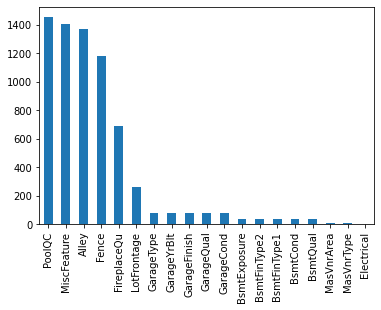

In [ ]:
missing_data.plot.bar()

In [ ]:
porcentaje = missing_data/X_data.shape[0]
missing_data_df = pd.concat([missing_data, porcentaje], axis=1, keys=['Total', 'Relativo'])

In [ ]:
missing_data_df 

,Total,Relativo
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


**Variables a eliminar:** <font color='red'>Street, Utilities, Condition2, RoofMatl, Heating, PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage </font>

In [ ]:
remove_cat = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 
              'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

In [ ]:
# Procedemos a eliminar
var_cat = [x for x in var_cat if x not in remove_cat]
var_num = [x for x in var_num if x not in remove_cat]

In [ ]:
# Nuevo numero de variables categoricas
print("V. Num:", len(var_num))
print("V. Cat:", len(var_cat))

V. Num: 35
V. Cat: 33


## 3. Analisis de las caracteristicas

### 3.1. Analisis de la variable objetivo

In [ ]:
y = X_data['SalePrice']

In [ ]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribucion del conjunto

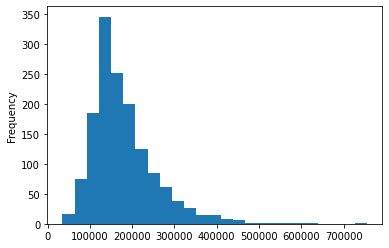

In [ ]:
import matplotlib.pyplot as plt
y.plot.hist(bins=25)

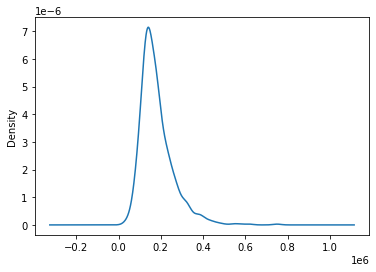

In [ ]:
y.plot.kde()

Obtenemos Kurtosis y Asimetria

In [ ]:
print("Asimetria:",y.skew())
print("Kurtosis:",y.kurt())

Asimetria: 1.8828757597682129
Kurtosis: 6.536281860064529


Aplicamos la transformacion logaritmica

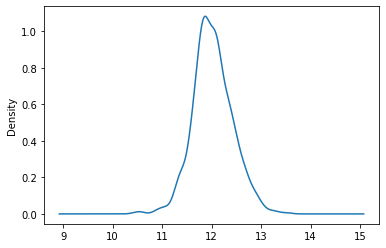

In [ ]:
import numpy as np
y_log = np.log(y)
y_log.plot.kde()

In [ ]:
print("Asimetria:",y_log.skew())
print("Kurtosis:",y_log.kurt())

Asimetria: 0.12133506220520406
Kurtosis: 0.8095319958036296


### 3.2. Analisis de la distribucion de las caracteristicas numericas

Graficamos histogramas de todas las caracteristicas numericas

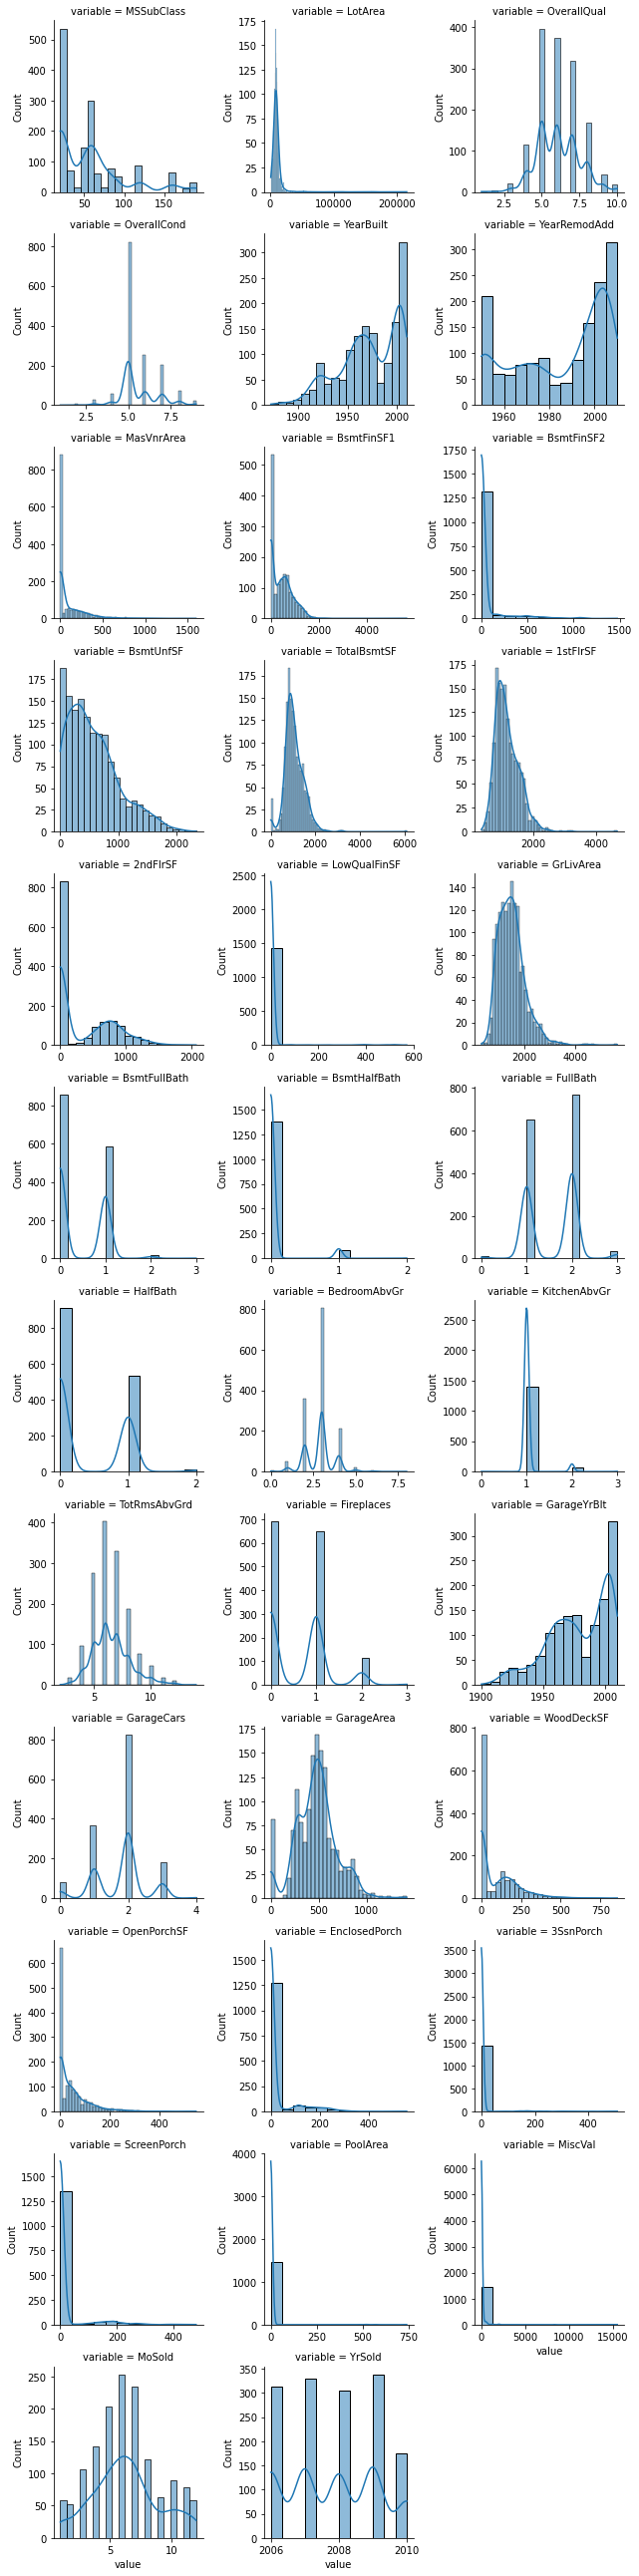

In [ ]:
import seaborn as sns
f = pd.melt(X_data, value_vars = var_num)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

### 3.3. Analisis de las caracteristicas categoricas

Histograma

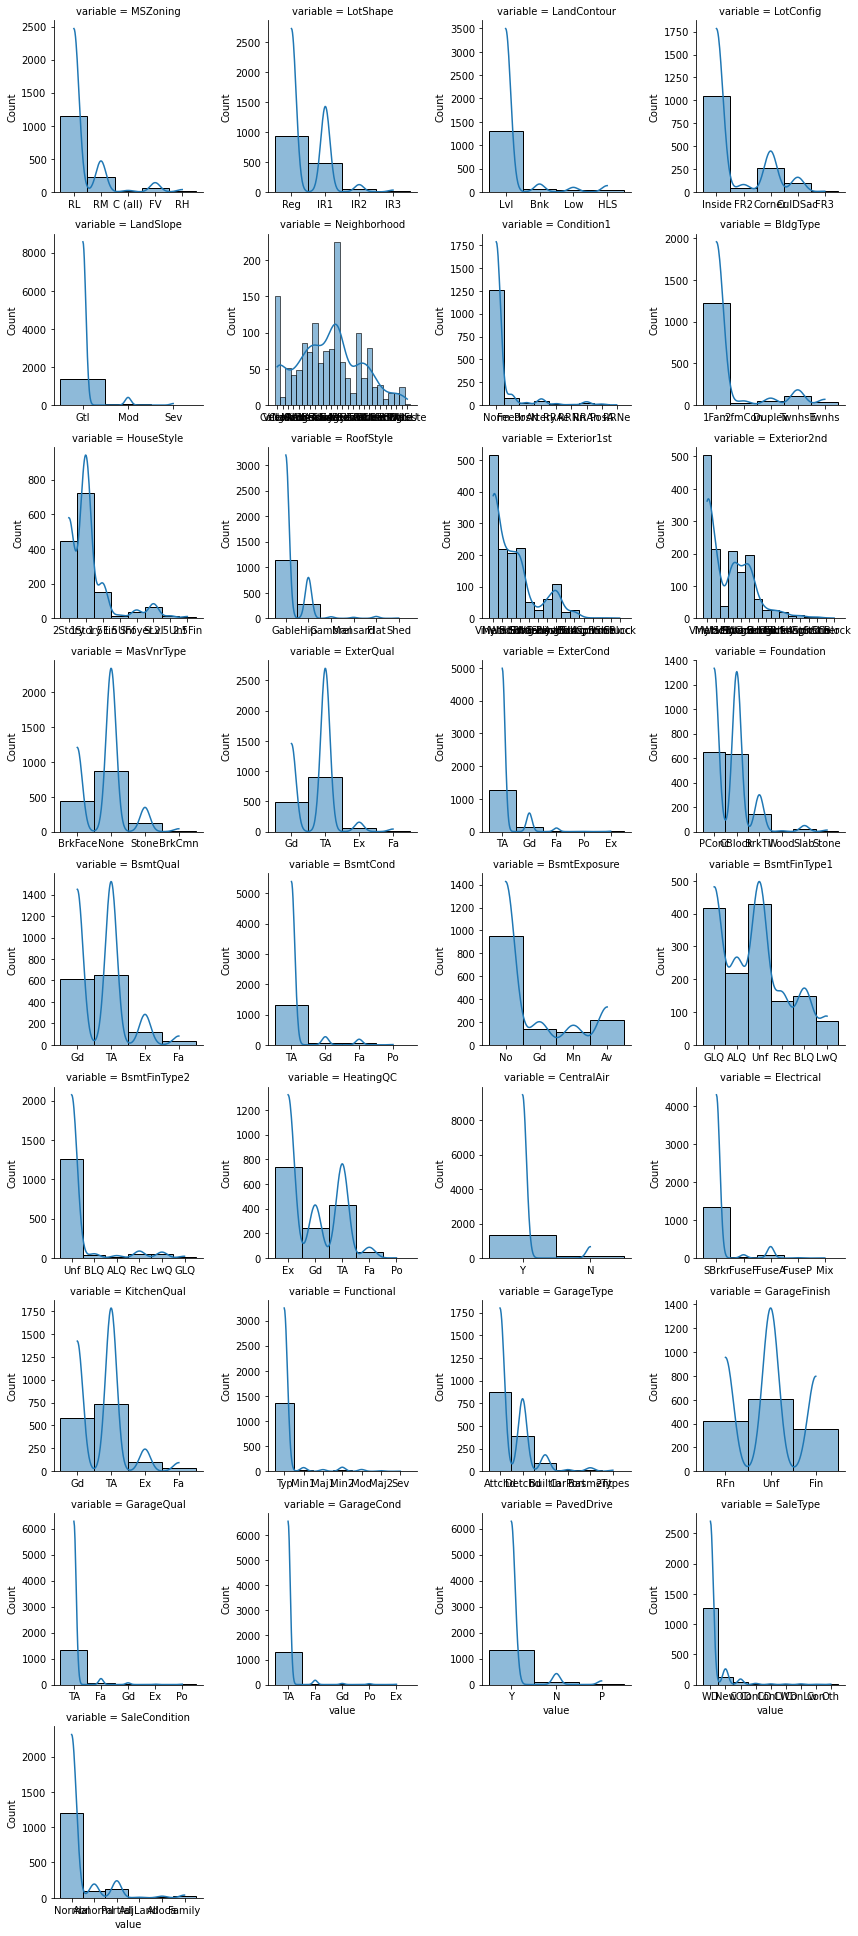

In [ ]:
f = pd.melt(X_data, value_vars = var_cat)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

Diagrama de cajas

In [ ]:
def boxplot(x,y, **kwargs):
  sns.boxplot(x=x,y=y)
  x = plt.xticks(rotation=90)

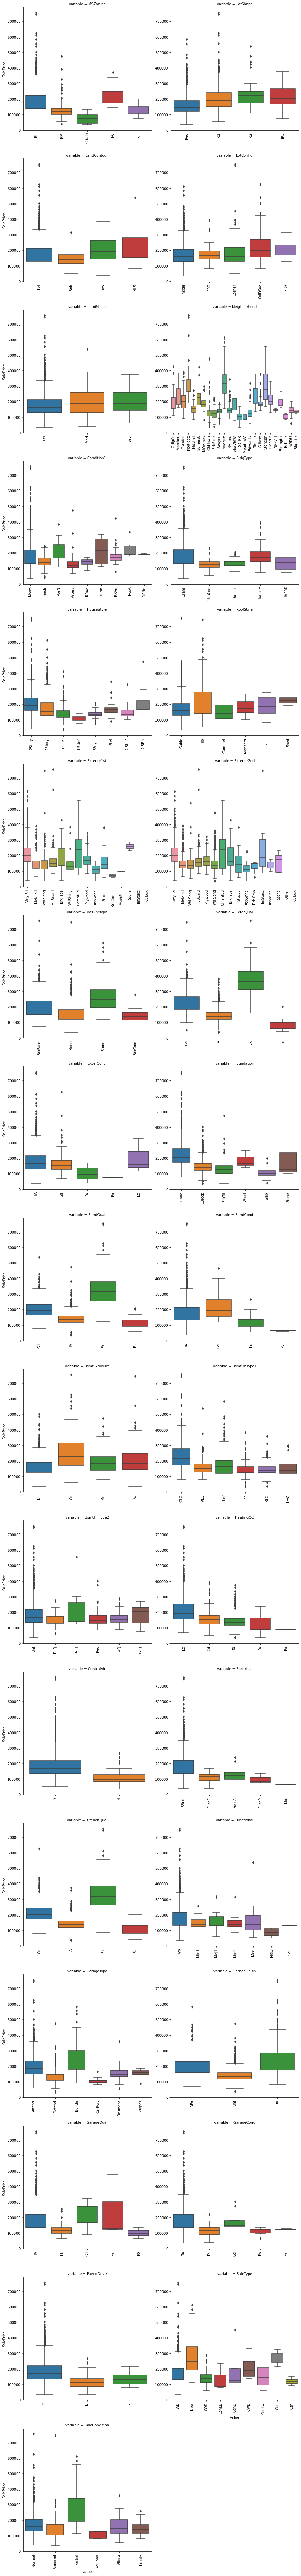

In [ ]:
f = pd.melt(X_data, value_vars = var_cat, id_vars=['SalePrice'])
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, height=6)
g = g.map(boxplot, "value", "SalePrice")

Variables importantes: <font color='green'> Neighborhood, ExterQual, KitchenQual, BsmtQual</font>

Analisis ANOVA

In [ ]:
from scipy.stats import stats
def anova_cat(df, obj, feat):
  anv = pd.DataFrame()
  anv['Features'] = feat
  pvals = []
  for f in feat:
    samples = []
    for catg in df[f].unique():
      s = df[df[f]==catg][obj].values
      samples.append(s)
    pval = stats.f_oneway(*samples)[1]
    pvals.append(pval)
  anv['Pval'] = pvals
  anv['Disparidad'] = np.log(1./anv['Pval'].values)
  return anv.sort_values('Pval')

In [ ]:
anv = anova_cat(X_data,'SalePrice', var_cat)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


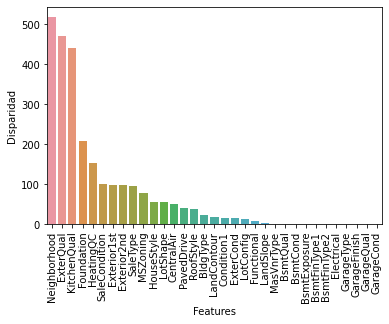

In [ ]:
sns.barplot(data=anv, x='Features', y='Disparidad')
x = plt.xticks(rotation=90)

### 3.3 Analisis de las caracteristicas numericas

In [ ]:
# Matriz de correlacion
mat_corr = X_data[var_num].corr()

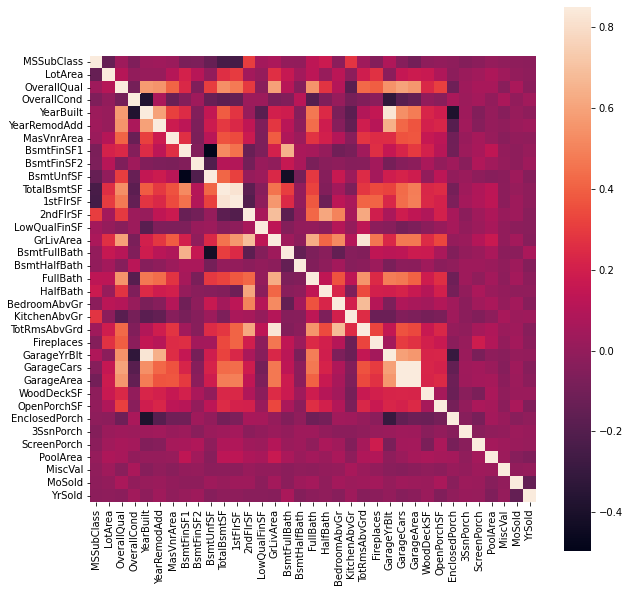

In [ ]:
plt.figure(1, figsize=(10,10))
sns.heatmap(mat_corr, vmax=.85, square=True)

Identificamos las siguientes relaciones:
* GarageCars y GarageArea
* YearBuilt y GarageYrBlt
* GrLivArea y TotRmsAbvGrd

In [ ]:
mat_corr = X_data.corr()
cols = mat_corr.nlargest(10, 'SalePrice')['SalePrice'].index
mat_corr = np.corrcoef(X_data[cols].values.T) 

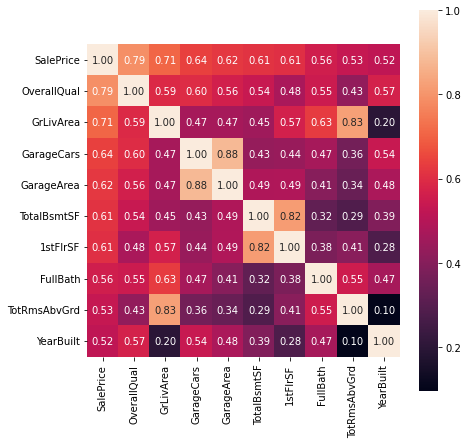

In [ ]:
plt.figure(2,figsize=(7,7))
sns.heatmap(mat_corr, cbar=True, annot=True, square=True, fmt='.2f', 
            yticklabels=cols.values, xticklabels=cols.values)

## 4. Resumen del analisis

Solamente consideraremos las siguientes variables categoricas

In [ ]:
print(var_cat)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Debemos eliminar

In [ ]:
print(remove_cat)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']


<font color='blue'> No olvidar remover Id </font>

Debemos aplicar una estrategia para valores faltantes

In [ ]:
missing_data_df2 = missing_data_df[missing_data_df['Relativo']<0.10]
missing_data_df2 

,Total,Relativo
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342


Debemos normalizar los datos

Caracteristicas categoricas mas importantes (OneHotEncoder):

In [ ]:
anv.head()

,Features,Pval,Disparidad
5,Neighborhood,1.558600e-225,517.637858
13,ExterQual,1.439551e-204,469.363028
24,KitchenQual,3.032213e-192,440.987045
15,Foundation,5.791895e-91,207.778784
21,HeatingQC,2.667062e-67,153.292224


Caracteristicas numericas mas importantes

In [ ]:
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


Opcional:
* Corregir la distribucion
* Eliminar valores anomalos
* Eliminar clases con pocos datos

## 5. Preprocesamiento

In [ ]:
X_array = X_data.values[:,:-1]
Y_array = X_data.values[:,-1]

In [ ]:
print("X:",X_array.shape)
print("Y:",Y_array.shape)

X: (1460, 80)
Y: (1460,)


### a) Eliminar caracteristicas

In [ ]:
all_features = X_data.columns

In [ ]:
remove_index = [i for i, label in enumerate(all_features, start=0) if label in remove_cat]

In [ ]:
print("Indices a remover:",remove_index)
# No olvidar adicionar el 0 para eliminar el ID

Indices a remover: [3, 5, 6, 9, 14, 22, 39, 57, 72, 73, 74]


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveFeatures(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.rm_index = [0, 3, 5, 6, 9, 14, 22, 39, 57, 72, 73, 74]
  
  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    X = np.delete(X, self.rm_index, axis=1)
    return X

In [ ]:
# Antes
X_array.shape

(1460, 80)

In [ ]:
# Despues
remf = RemoveFeatures()
X_array1 = remf.fit_transform(X_array)
X_array1.shape

(1460, 68)

### b) Estrategia para valores faltantes

In [ ]:
remove_cat.append('Id')

Empezamos con las caracteristicas numericas

In [ ]:
all_features = [x for x in all_features if x not in remove_cat]

In [ ]:
num_index = [i for i, label in enumerate(all_features, start=0) if label in var_num]

In [ ]:
print("Indices C. Numerica:", num_index)

Indices C. Numerica: [0, 2, 11, 12, 13, 14, 19, 27, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 50, 52, 53, 57, 58, 59, 60, 61, 62, 63, 64, 65]


Caracteristicas categoricas

In [ ]:
cat_index = [i for i, label in enumerate(all_features, start=0) if label in var_cat]

In [ ]:
print("Indices C. Categorica:", cat_index)

Indices C. Categorica: [1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 32, 33, 34, 45, 47, 49, 51, 54, 55, 56, 66, 67]


Definimos la nueva clase

In [ ]:
from sklearn.impute import SimpleImputer

class MyImputer(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.num_index = [0, 2, 11, 12, 13, 14, 19, 27, 29, 30, 31, 35, 36, 37, 
                      38, 39, 40, 41, 42, 43, 44, 46, 48, 50, 52, 53, 57, 
                      58, 59, 60, 61, 62, 63, 64, 65]

    self.cat_index = [1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21, 22, 
                      23, 24, 25, 26, 28, 32, 33, 34, 45, 47, 49, 51, 54, 55, 
                      56, 66, 67]

    self.cat_imputer = SimpleImputer(strategy="most_frequent")
    self.num_imputer = SimpleImputer(strategy="mean")
  
  def fit(self, X, y=None):
    self.cat_imputer.fit(X[:,self.cat_index])
    self.num_imputer.fit(X[:,self.num_index])
    return self
  
  def transform(self, X, y=None):
    X[:,self.cat_index] = self.cat_imputer.transform(X[:,self.cat_index])
    X[:,self.num_index] = self.num_imputer.transform(X[:,self.num_index])
    return X

In [ ]:
# Antes 
X_array1.shape

(1460, 68)

In [ ]:
# Despues
myimp = MyImputer()
X_array2 = myimp.fit_transform(X_array1)
X_array2.shape

(1460, 68)

### c) Normalizacion

In [ ]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()

In [ ]:
class MyScaler(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.num_index = [0, 2, 11, 12, 13, 14, 19, 27, 29, 30, 31, 35, 36, 37, 
                      38, 39, 40, 41, 42, 43, 44, 46, 48, 50, 52, 53, 57, 
                      58, 59, 60, 61, 62, 63, 64, 65]

    self.cat_index = [1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21, 22, 
                      23, 24, 25, 26, 28, 32, 33, 34, 45, 47, 49, 51, 54, 55, 
                      56, 66, 67]
    self.sscaler = StandardScaler()
  
  def fit(self, X, y=None):
    self.sscaler.fit(X[:,self.num_index])
    return self
  
  def transform(self, X, y=None):
    X[:,self.num_index] = self.sscaler.transform(X[:,self.num_index])
    return X

In [ ]:
# Antes
X_array2[0]

array([60.0, 'RL', 8450.0, 'Reg', 'Lvl', 'Inside', 'Gtl', 'CollgCr',
       'Norm', '1Fam', '2Story', 7.0, 5.0, 2003.0, 2003.0, 'Gable',
       'VinylSd', 'VinylSd', 'BrkFace', 196.0, 'Gd', 'TA', 'PConc', 'Gd',
       'TA', 'No', 'GLQ', 706.0, 'Unf', 0.0, 150.0, 856.0, 'Ex', 'Y',
       'SBrkr', 856.0, 854.0, 0.0, 1710.0, 1.0, 0.0, 2.0, 1.0, 3.0, 1.0,
       'Gd', 8.0, 'Typ', 0.0, 'Attchd', 2003.0, 'RFn', 2.0, 548.0, 'TA',
       'TA', 'Y', 0.0, 61.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2008.0, 'WD',
       'Normal'], dtype=object)

In [ ]:
# Despues
myscaler = MyScaler()
X_array3= myscaler.fit_transform(X_array2)
X_array3[0]

array([0.07337496353744775, 'RL', -0.20714170777431132, 'Reg', 'Lvl',
       'Inside', 'Gtl', 'CollgCr', 'Norm', '1Fam', '2Story',
       0.6514792433257054, -0.5171998069472914, 1.0509937888999856,
       0.8786680880058696, 'Gable', 'VinylSd', 'VinylSd', 'BrkFace',
       0.5114184144641142, 'Gd', 'TA', 'PConc', 'Gd', 'TA', 'No', 'GLQ',
       0.5754248369676035, 'Unf', -0.2886528311122454,
       -0.9445906057378156, -0.4593025408311876, 'Ex', 'Y', 'SBrkr',
       -0.7934337933349002, 1.1618515874685553, -0.12024172373467248,
       0.3703334392167798, 1.1078101491462133, -0.24106103579929677,
       0.7897405221108432, 1.2275853765130371, 0.1637791168735145,
       -0.21145358120204893, 'Gd', 0.9122097711603002, 'Typ',
       -0.9512264882332893, 'Attchd', 1.0211566694093044, 'RFn',
       0.31172464418307205, 0.35100032086652694, 'TA', 'TA', 'Y',
       -0.7521758378613592, 0.2165031608388436, -0.3593249004055313,
       -0.11633928614822256, -0.2702083542015609, -0.06869174753820

### d) Adicion de nuevas caracteristicas

In [ ]:
most_num_feat = list(cols)
most_num_feat.remove('SalePrice')

In [ ]:
# Identificar los indices numericos
most_num_index = [x for x,label in enumerate(all_features, start=0) if label in most_num_feat]

In [ ]:
print("Indices numericos mas importantes:",most_num_index)

Indices numericos mas importantes: [11, 13, 31, 35, 38, 41, 46, 52, 53]


In [ ]:
# Identificar los indices categoricos
most_cat_feat = anv.values[:5,0]

In [ ]:
most_cat_index = [x for x,label in enumerate(all_features, start=0) if label in most_cat_feat]

In [ ]:
print("Indices categoricos mas importantes:",most_cat_index)

Indices categoricos mas importantes: [7, 20, 22, 32, 45]


In [ ]:
# Identificar los indices categoricos menos importantes
other_cat_index = [x for x in cat_index if x not in most_cat_index]

In [ ]:
print("Indices categoricos menos importantes:",other_cat_index)

Indices categoricos menos importantes: [1, 3, 4, 5, 6, 8, 9, 10, 15, 16, 17, 18, 21, 23, 24, 25, 26, 28, 33, 34, 47, 49, 51, 54, 55, 56, 66, 67]


Creamos la clase para adicionar caracteristicas

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
class AddFeatures(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.num_index = [11, 13, 31, 35, 38, 41, 46, 52, 53]
    self.cat_index = [7, 20, 22, 32, 45]
    self.other_cat_index = [1, 3, 4, 5, 6, 8, 9, 10, 15, 16,
                            17, 18, 21, 23, 24, 25, 26, 28, 33, 34, 
                            47, 49, 51, 54, 55, 56, 66, 67]
    self.pf = PolynomialFeatures(degree=2,include_bias = False) # Polinomios de 2do grado
    self.ohe = OneHotEncoder()
    self.orde = OrdinalEncoder()

  def fit(self, X, y=None):
    self.pf.fit(X[:,self.num_index])
    self.ohe.fit(X[:,self.cat_index])
    self.orde.fit(X[:,self.other_cat_index])
    return self
  
  def transform(self, X, y=None):
    X[:,self.other_cat_index] = self.orde.transform(X[:,self.other_cat_index]) # Encoder ordinario
    X2 = self.pf.transform(X[:,self.num_index])
    X3 = self.ohe.transform(X[:,self.cat_index]).toarray()
    X = np.delete(X, self.num_index + self.cat_index, axis=1)
    X = np.c_[X,X2,X3]
    return X

In [ ]:
# Antes
X_array3.shape

(1460, 68)

In [ ]:
# Despues
addf = AddFeatures()
X_array4 = addf.fit_transform(X_array3)
X_array4.shape

(1460, 152)

In [ ]:
X_array4[0]

array([0.07337496353744775, 3.0, -0.20714170777431132, 3.0, 3.0, 4.0, 0.0,
       2.0, 0.0, 5.0, -0.5171998069472914, 0.8786680880058696, 1.0, 12.0,
       13.0, 1.0, 0.5114184144641142, 4.0, 2.0, 3.0, 3.0, 2.0,
       0.5754248369676035, 5.0, -0.2886528311122454, -0.9445906057378156,
       1.0, 4.0, 1.1618515874685553, -0.12024172373467248,
       1.1078101491462133, -0.24106103579929677, 1.2275853765130371,
       0.1637791168735145, -0.21145358120204893, 6.0, -0.9512264882332893,
       1.0, 1.0211566694093044, 1.0, 4.0, 4.0, 2.0, -0.7521758378613592,
       0.2165031608388436, -0.3593249004055313, -0.11633928614822256,
       -0.2702083542015609, -0.06869174753820707, -0.08768781151769862,
       -1.599111099180035, 0.1387774889497933, 8.0, 4.0,
       0.6514792433257054, 1.0509937888999856, -0.4593025408311876,
       -0.7934337933349002, 0.3703334392167798, 0.7897405221108432,
       0.9122097711603002, 0.31172464418307205, 0.35100032086652694,
       0.42442520448423365, 0.6847

## 6. Creacion del Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(RemoveFeatures(),MyImputer(),MyScaler(),AddFeatures()),

In [ ]:
pipeline[0]

Pipeline(steps=[('removefeatures', RemoveFeatures()),
                ('myimputer', MyImputer()), ('myscaler', MyScaler()),
                ('addfeatures', AddFeatures())])

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('RemoveFeat', RemoveFeatures()),
                                ('Imputer',MyImputer()),
                                ('Normalizacion',MyScaler()),
                                ('NewFeat',AddFeatures())])

In [ ]:
pipeline

Pipeline(steps=[('RemoveFeat', RemoveFeatures()), ('Imputer', MyImputer()),
                ('Normalizacion', MyScaler()), ('NewFeat', AddFeatures())])

In [ ]:
# Ajustamos el pipeline
pipeline.fit(X_array)

Pipeline(steps=[('RemoveFeat', RemoveFeatures()), ('Imputer', MyImputer()),
                ('Normalizacion', MyScaler()), ('NewFeat', AddFeatures())])

In [ ]:
# Inicio
X_array.shape

(1460, 80)

In [ ]:
# Final
X_array_f = pipeline.transform(X_array)
X_array_f.shape

(1460, 152)

## 6. Implementacion del modelo

#### 6.1 Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_array_f,Y_array)

LinearRegression()

In [ ]:
# Observamos el score del conjunto de entrenamiento
lr.score(X_array_f,Y_array)

0.9217683623951397

Hacemos una prediccion

In [ ]:
test_data = pd.read_csv('test.csv')
X_test = test_data.values

In [ ]:
X_test.shape

(1459, 80)

In [ ]:
X_test = pipeline.transform(X_test) # Preprocesamiento

In [ ]:
Y_test = lr.predict(X_test)

In [ ]:
Y_test[:5]

array([130861.1953125, 158143.6953125, 195420.1953125, 195380.1953125,
       201113.1953125])

Exportar modelo

In [ ]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
import pickle
with open('pipeline.pkl','wb') as p_file:
  pickle.dump(pipeline, p_file)
with open('modelo.pkl','wb') as p_file:
  pickle.dump(lr, p_file)

Validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [146]:
mse = cross_val_score(lr,X_array_f, Y_array, scoring=scorer, cv=8)

In [147]:
mse

array([-5.01194114e+08, -4.27230754e+25, -2.17196999e+09, -9.35201823e+08,
       -6.56140678e+08, -4.14958894e+08, -1.67049064e+09, -1.25364840e+09])

In [148]:
rmse = np.sqrt(-mse)

In [149]:
rmse

array([2.23873651e+04, 6.53628912e+12, 4.66043988e+04, 3.05810697e+04,
       2.56152431e+04, 2.03705399e+04, 4.08716361e+04, 3.54068977e+04])

In [150]:
print("RMSE:",rmse.mean())

RMSE: 817036167562.747
